# Bounding Box Creation 

In [20]:
from PIL import Image
import numpy
import matplotlib.pyplot as plt
import math
import os,cv2

### Load Image ###

In [21]:
def loadImage(path,name):
    image = Image.open('{path}/{name}'.format(path=path,name=name)).convert('L')
    testData = 255 - numpy.asarray(image)   
    return testData

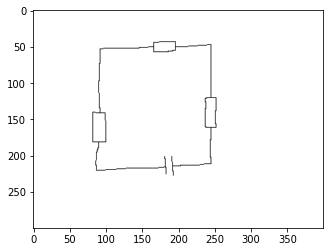

In [22]:
image = loadImage("./testImages","0.png")
plt.imshow(image, cmap=plt.cm.binary,interpolation="bilinear")

## Define Features ##

### Feature Types:
- End Point
- Intersection
- Center

In [23]:
class Feature():
    def __init__(self,x,y) -> None:
        self.x = x
        self.y = y

class EndPoint(Feature):
    pass
class Intersection(Feature):
    pass
class Center(Feature):
    pass

## Feature functions ###

In [24]:
def getDistance(point1,point2):
    return math.sqrt((point1.x-point2.x)**2 + (point1.y-point2.y)**2)

def getClosestPoint(point,pointList):
    indexOfMinimum = numpy.argmin(map(lambda p: getDistance(point,p),pointList))
    return pointList[indexOfMinimum]

def getNClosestPoint(point,pointList,n):
    indexiesOfMinima = (map(lambda p: getDistance(point,p),pointList)).argsort()[:n]
    elements = map(lambda index: pointList[index],indexiesOfMinima)
    return elements

### Set Features ###

(In the Future this is replaced by featureRecognicion Algorithm)
Features also need to be cleand

In [25]:
endPointList = [EndPoint(181,201),
                EndPoint(191,201),
                EndPoint(183,225),
                EndPoint(193,227)]

intersectionList = [Intersection(245,161),
                Intersection(245,120),
                Intersection(196,50),
                Intersection(166,50),
                Intersection(92,141),
                Intersection(90,181),
                Intersection(182,215),
                Intersection(192,214)]

## Print Feature Points

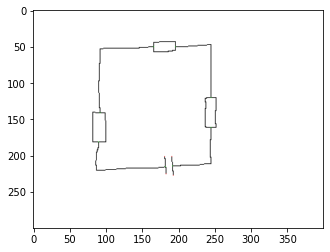

In [26]:
#make a rgb copy form an 1 bit image
outImage = []
for y in range(0,len(image)):
    row = []
    for x in range(0,len(image[y])):
        if image[y][x] >= 1:
            row.append((0,0,0))
        else:
            row.append((255,255,255))
    outImage.append(row)

for endPoint in endPointList:
    outImage[endPoint.y][endPoint.x] = (255,0,0)

for intersection in intersectionList:
    outImage[intersection.y][intersection.x] = (0,255,0)
    
plt.imshow(outImage, interpolation='bilinear')